## Згенерувати експоненційний закон розподілу

In [32]:
import numpy as np
from numpy.random import uniform, seed
from numpy.typing import NDArray
from typing import Tuple, Union

def random_nums(size: int, interval: Tuple[float, float] = (0.0, 1.0)) -> Union[float, NDArray]:
    """Generate random numbers from interval"""
    return uniform(*interval, size)
    
def set_seed(seed_value):
    seed(seed_value)

In [39]:
from numpy import exp

# Lambda parameter for generating
eta = 10
# Number of generating
N = 10000

def exponential(size: int, param: float):
    """Generator of exponential function"""
    return - 1 / param * np.log(random_nums(size))

def density_exponential(x, param):
    """Density of exponential funtion"""
    return param * exp(-param * x)
    
# Our generation values
x_exp = exponential(N, eta)
print("Exponential generated number:", x_exp[:5]) 
print("Min and max values:", min(x_exp), max(x_exp))

Exponential generated number: [0.05214206 0.22167256 0.17586296 0.00597795 0.0511822 ]
Min and max values: 1.4804300529889302e-05 0.8642862292385491


In [40]:
# Number of intervals
bins_num = 20
# Minimum number of interval
min_number = 5

counts, edges = np.histogram(x_exp, bins=bins_num)
print("Number of values in each interval:")
print("- before merging", counts)

# Merging intervals
accumulated_count, bin_edges = 0, [edges[0]]
for new_count, edge in zip(counts, edges[1:]):
    accumulated_count += new_count
    if accumulated_count >= min_number:
        bin_edges.append(edge)
        accumulated_count = 0
if counts[-1] < min_number:
    bin_edges.pop(-1)
    bin_edges.append(edges[-1])


new_intervals, _ = np.histogram(x_exp, bins=bin_edges)
print("- after merging", new_intervals)

Number of values in each interval:
- before merging [3499 2294 1503  904  632  406  277  161  128   62   45   34   16    9
   10    8    4    2    4    2]
- after merging [3499 2294 1503  904  632  406  277  161  128   62   45   34   16    9
   10    8    6    6]


Mean of distribution:  0.10029595761768001
Variance of distribution: 0.010080632101797394


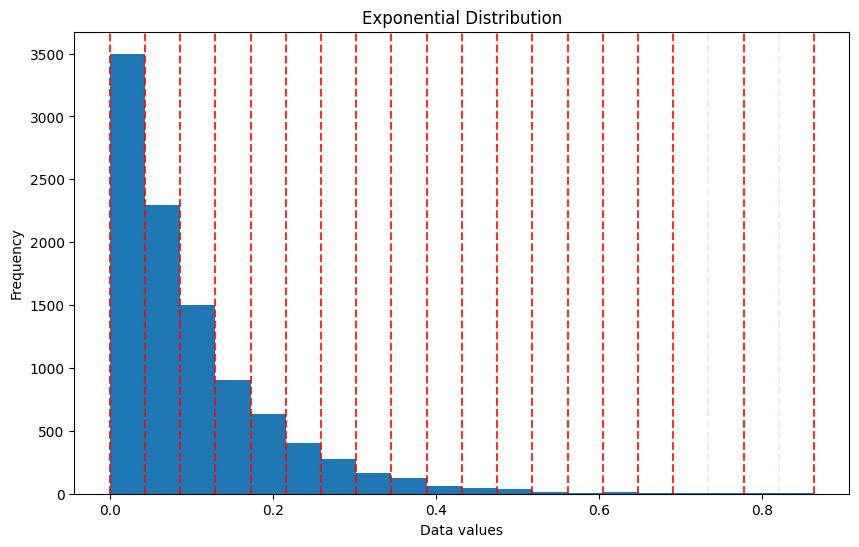

In [41]:
from matplotlib import pyplot as plt
from statistics import mean, variance, stdev

plt.figure(figsize=(10, 6))
plt.title("Exponential Distribution")
plt.hist(x_exp, bins=bin_edges)


_, special_edges = np.histogram(x_exp, bins=bins_num)
for edge in special_edges:
    plt.axvline(edge, color='green', linestyle='--', alpha=0.1)
    
    
# Plot vertical lines at the bin edges
for edge in bin_edges:
    plt.axvline(edge, color='red', linestyle='--', alpha=0.8)
    
print("Mean of distribution: ", mean(x_exp))
print("Variance of distribution:", variance(x_exp))

plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Calculating chi squared
# Calculating middles and width of intervals
bin_mids = np.array([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)])
bin_width = np.array([bin_edges[i+1] - bin_edges[i] for i in range(len(bin_edges) - 1)])

In [43]:
# Determine the expected probability and theoretical values
expected_prob = density_exponential(bin_mids, eta) * bin_width
theoretical_values = 10000 * expected_prob
print("Theoretical values")
for value in theoretical_values:
    print(int(value), end=' ')

Theoretical values
3481 2259 1466 952 618 401 260 169 109 71 46 30 19 12 8 5 5 2 

In [44]:
from scipy.stats import chi2_contingency

data = [new_intervals, theoretical_values]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Two distributions are independent')
else:
    print('Two distributions are dependent')

p value is 0.9632981023164874
Two distributions are dependent
